In [31]:
"""
  This script analyzes hashtags alone occured in the tweets
  
  This could give us a general overview of topics that are occuring in the news
  
  Types of analysis performed:
  
    1. Word count - Word Cloud of hashtags - 
    2. Hash Tag analysis across time (Similar to topic evolution)
"""

# need to reload sys and copy stdout 
# to avoid printing in terminal/std output
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

import pandas as pd
import os


# load clean data
data_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'data', 'clean', 'data.csv')
data = pd.read_csv(data_path)

In [32]:
# re to extract hash tags
import re
hashtagre = re.compile(r"#(\w+)")



def getHashTagFreq(unigrams):
    
    """
        get frequency counts of hashtags.
        input: list of hashtags across all the doucments.
    """    
    
    # init dict with tokens as the keys
    wordFreqDict = dict()
    for word in unigrams:
        if word in wordFreqDict.keys():
            wordFreqDict[word] = wordFreqDict[word] + 1 
        else:
            wordFreqDict[word] = 1

    return wordFreqDict



hashtag_list = []
for text in data["text"].values:
    tags = hashtagre.findall(text)
    if len(tags) != 0:
        hashtag_list.extend(tags)    

## Simple Hashtag analysis using count based word-cloud:

(-0.5, 1199.5, 799.5, -0.5)

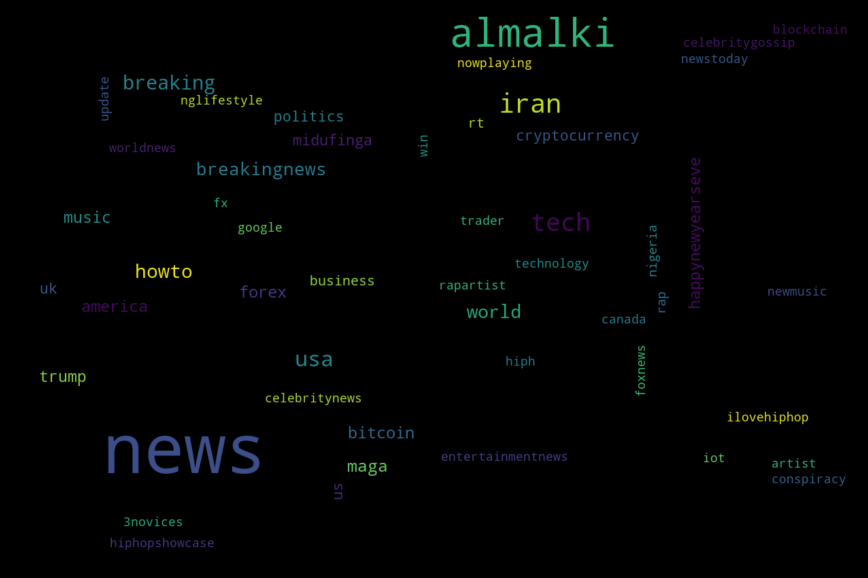

In [33]:
# generate word clouds from freqDict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# unigrams wordcloud
wordcloud = WordCloud(max_words=50, width=1200, height=800, max_font_size=40).generate_from_frequencies(getHashTagFreq(hashtag_list), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

From the above chart we could clearly see the various hot topics in twitter asociated with #news. It would intresting to see if word2vec captures these semantically. 

1. Almalki
2. music/celebrities: ilovehiphop, rapartist, celebritygossip, trump
3. countries/places: iran, india, usa, canada, sydney, china, shanghai, uk, nigeria
4. trading/markets: bitcoin, forex, money
5. tech: cryptocurrency, blockchain, google, iot


Let's try to do topic analysis across time, to get some interesting insights:

## Topic analysis across time using tf-idf: (on whole tweet)

Let's try to visualize hashtag across time. Wordclouds give a summary of frequent words on a bulk of data. They dont specificaly take time into consideration. Some topics fade with time. Below is an example of how to use tf-idf to get important terms for each time period. 

NOTE: tf-idf approach will fail. Becuase some topics occur frequently and occur over a breadth of time period and are most important. In tf-idf such topics will be given less weight. 

Work Around: to take the top 20 and last 20 and analyze 





In [39]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)


bloblist = []
for name, group in data.groupby(["date"]):
    print name
    
#     hashtag_list = []
#     for text in data["text"].values:
#         tags = hashtagre.findall(text)
#         if len(tags) != 0:
#             hashtag_list.extend(tags)   
            
    
    bloblist.append(tb(unicode(" ".join(group["text"].values), errors="ignore")))
    
topic_tuples = []    
for i, blob in enumerate(bloblist):
    
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        #hashtag_list.append(word)
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
    
        topic_tuples.append((i, word, score)) 
        
    
    

2018-01-02 05
2018-01-02 06
2018-01-02 07
2018-01-02 08
2018-01-02 09
2018-01-04 00
2018-01-04 01
2018-01-04 03
2018-01-04 04
date
Top words in document 1
	Word: 0, TF-IDF: 0.0
	Word: eecting, TF-IDF: 0.0
	Word: dollar, TF-IDF: 0.0
	Word: results, TF-IDF: 0.0
	Word: gang, TF-IDF: 0.0
Top words in document 2
	Word: u0, TF-IDF: 0.0
	Word: solopreneurs, TF-IDF: 0.0
	Word: yellow, TF-IDF: 0.0
	Word: four, TF-IDF: 0.0
	Word: gag, TF-IDF: 0.0
Top words in document 3
	Word: four, TF-IDF: 0.0
	Word: gag, TF-IDF: 0.0
	Word: februaryend, TF-IDF: 0.0
	Word: jihad, TF-IDF: 0.0
	Word: francesco, TF-IDF: 0.0
Top words in document 4
	Word: four, TF-IDF: 0.0
	Word: prices, TF-IDF: 0.0
	Word: jihad, TF-IDF: 0.0
	Word: aegis, TF-IDF: 0.0
	Word: kpoptv, TF-IDF: 0.0
Top words in document 5
	Word: u0, TF-IDF: 0.0
	Word: yellow, TF-IDF: 0.0
	Word: factory, TF-IDF: 0.0
	Word: four, TF-IDF: 0.0
	Word: prices, TF-IDF: 0.0
Top words in document 6
	Word: eecti…, TF-IDF: 0.0
	Word: limited, TF-IDF: 0.0
	Word: tod

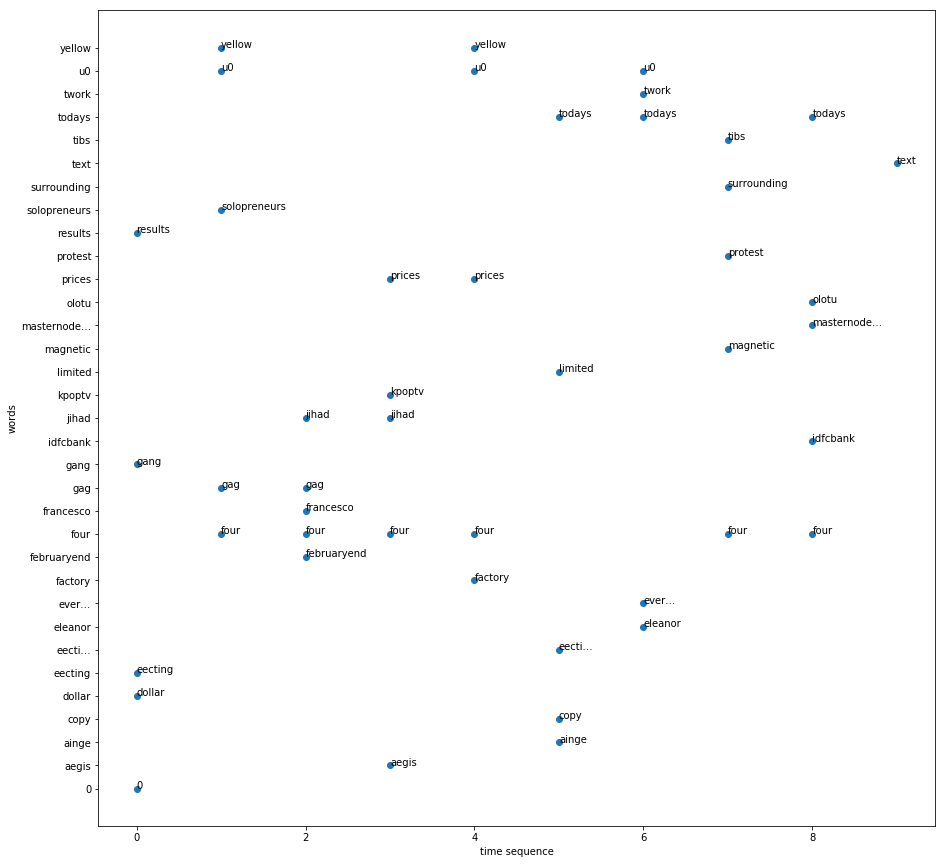

In [62]:
dates = []
labels = []
scores = []
for date, word, score in topic_tuples:
    dates.append(date)
    labels.append(word)
    scores.append(score)

    
import matplotlib.pyplot as plt

# plt.xlabel('time (s)')
# plt.ylabel('score/topic weight')
# plt.title('Topic analysis across time: not exactly burst')

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(dates, labels)
ax.set_xlabel('time sequence')
ax.set_ylabel('words')
for i, txt in enumerate(labels):
    ax.annotate(txt, (dates[i], labels[i]))


Conclusion:

As you can see in the above plot, the word "four" has more importance across the entire time period.
So I looked back into the data to see why and found some tweets:

1. #news #spain #spain horror four injured as car mounts pavement in busy street
2. mumbai bandh live updates five including four cops injured in protests hospitalised 
3. eurusd hits highest level in four months poised to test 2017 high #forex #eurusd #fx #news

and many more.


TODO: The above code can be expanded just to handle hashtags/ or just selected pos tags. 